<a href="https://colab.research.google.com/github/Aline-Noronha/ImersaoDadosEnem2019/blob/main/Mulheres_no_Enem_2019ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imersão em Data Science Alura:

A alura promoveu uma imersão em data science, da qual tive a alegria de participar e também da qual este projeto é fruto. 

Tive acesso aos microdados do Enem/2019 através da alura, que também disponibilizou online aulas de análise de dados, machine learning e acesso a uma comunidade no discord para perguntas e acesso aos materiais.

Este projeto contém o um resumo de anotações e pesquisas que fiz sobre cada assunto que aprendi na imersão, além de conter também minha pesquisa pessoal sobre a participação das mulheres no Enem. 

Levantei questões relacionadas a curiosidades pessoais sobre o quanto a classe social poderia interferir na qualidade do aprendizado e na conquista de espaço das mulheres na sociedade. 

Pensando também na minha realidade de estudante de programação, como será o desempenho das mulheres na area das exatas? Os microdados me ajudarão a entender identificar algumas das causas da desigualdade de genero no Brasil?

Por fim, este modelo simulará uma previsão da nota das mulheres na prova de matemática do Enem. Lembrando que neste projeto usaremos apenas uma mostra dos dados do enem e não a base de dados completa.

Deixo esse link como apoio, um blogpost da Carolina Marits Santos, cientista da computação na USP, que vem lutando pela inclusão de mulheres na tecnologia e nas universidades, mais precisamente nas engenharias e ciências exatas.

https://jornal.usp.br/universidade/por-que-as-mulheres-desapareceram-dos-cursos-de-computacao/



# Microdados Enem/2019

O acesso aos dados se dá através da biblioteca Pandas, uma das mais utilizadas para manipalação e análise de dados em python. 

Quero deixar como indicação a documentação "10 minutes for pandas", um resumo sobre como funciona a biblioteca e exemplos práticos.
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html?highlight=pandas 

In [ ]:
import pandas as pd

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


Para descobrir o tamanho dessa mostra usamos o shape, que fornece o tamanho da tabela, incluindo linhas e colunas. Neste caso temos 136 colunas e 127380 linhas.

In [ ]:
dados.shape

(127380, 136)

In [ ]:
dados["SG_UF_RESIDENCIA"]

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object


Para obter as chaves das colunas usamos o columns.values:


In [ ]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

Para acessar duas colunas ao mesmo tempo, basta usar uma lista dentro de outra lista e passar a chave de cada coluna.

In [ ]:
dados[["SG_UF_RESIDENCIA", "Q025"]]

,SG_UF_RESIDENCIA,Q025
0,PA,B
1,PA,B
2,PA,B
3,PA,B
4,PA,B
...,...,...
127375,MG,B
127376,BA,B
127377,BA,B
127378,BA,A


In [ ]:
dados["SG_UF_RESIDENCIA"]

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

O método unique() mostra apenas o valor da coluna. Podemos observar então, todos os estados que participaram da prova.

Para saber mais:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html

In [ ]:
dados["SG_UF_RESIDENCIA"].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

Usando o len() podemos ler o conteúdo de uma coluna ou linha, e, nesse caso, confirmar a participação de alunos de 27 estados brasileiros na prova.

In [ ]:
len(dados["SG_UF_RESIDENCIA"].unique())

27

Usando o value_counts() temos acesso ao número de participantes em cada um dos 27 estados.


In [ ]:
dados["SG_UF_RESIDENCIA"].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

Número de inscritos por idade:

In [ ]:
dados["NU_IDADE"].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

Usando o sort_index() temos acesso aos valores das colunas em ordem crescente.

In [ ]:
dados["NU_IDADE"].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

# Métodos para análise de dados: hist(), query(), boxplot()






Para visualização dos dados, usamos o método `hist()` que plota um histograma do DataFrame. Um histograma é uma representação da distribuição dos dados.

Para aprender mais: 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html




Gráfico de inscritos por idade:

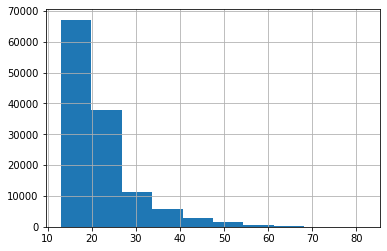

In [ ]:
dados["NU_IDADE"].hist()

Configurando o tamanho do histograma temos uma melhor visualização dos dados.

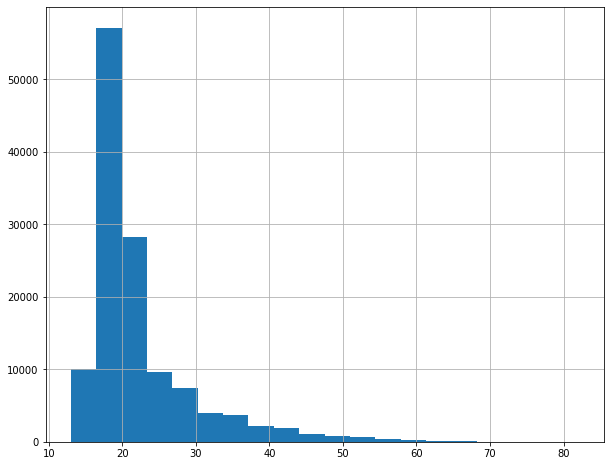

In [ ]:
dados["NU_IDADE"].hist(bins = 20, figsize = (10,8))

Para obter valores específicos de cada coluna, usamos método query() que permite o uso de expressões booleanas.

Para saber mais:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html

Aqui podemos analisar a participação dos treineiros por idade. Podemos observar que nos anos que antecedem o vestibular a participão dos jovens, prestes a entrar na faculdade, aumenta.

In [ ]:
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

Gráfico da nota de redação:

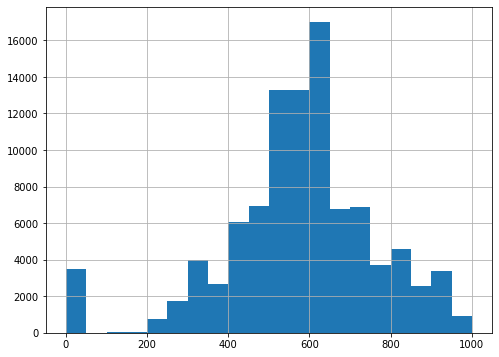

In [ ]:
dados["NU_NOTA_REDACAO"].hist(bins = 20, figsize=(8, 6))

Nota de linguagens e códigos:

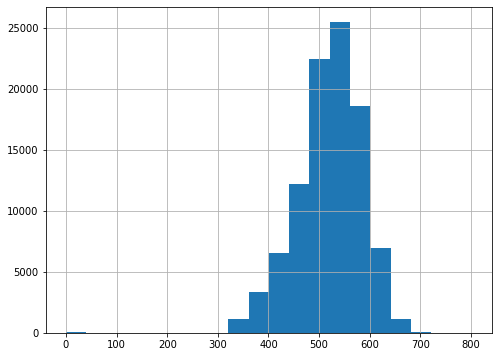

In [ ]:
dados["NU_NOTA_LC"].hist(bins = 20, figsize=(8, 6))

Média dos valores da nota de redação:

In [ ]:
dados["NU_NOTA_REDACAO"].mean()

571.5700253970197

A função std() mostra o desvio padrão do eixo na coluna desejada.

Para saber mais:
https://numpy.org/doc/stable/reference/generated/numpy.std.html

In [ ]:
dados["NU_NOTA_REDACAO"].std()

188.07645455749753

Criando uma nova lista para obter o resultado total das notas dos alunos.

In [ ]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


In [ ]:
dados["NU_NOTA_LC"].quantile(0.1)

434.5

Analisando os dados através do boxplot:


O boxplot nos permite uma analise geral sobre os dados, ele "acumula" no centro do gráfico o maior número de resultados em comum e joga para as extremidades os resultados mais esparços e disperços da média.

Para saber mais:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

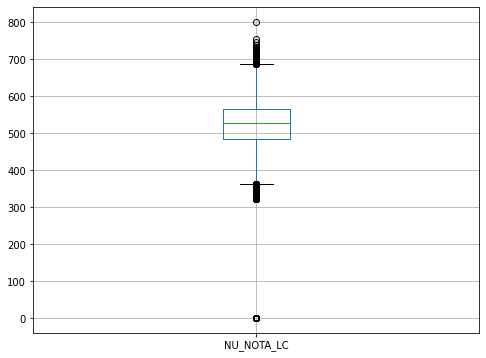

In [ ]:
dados["NU_NOTA_LC"].plot.box(grid = True, figsize=(8,6))

Aqui temos o boxplot de todas as notas e as principais concentração de notas em cada uma delas.  Podemos analisar neste caso, que a nota de redação é a que contem maior agrupamento de notas dos alunos e também na qual a media concentra as maiores notas.

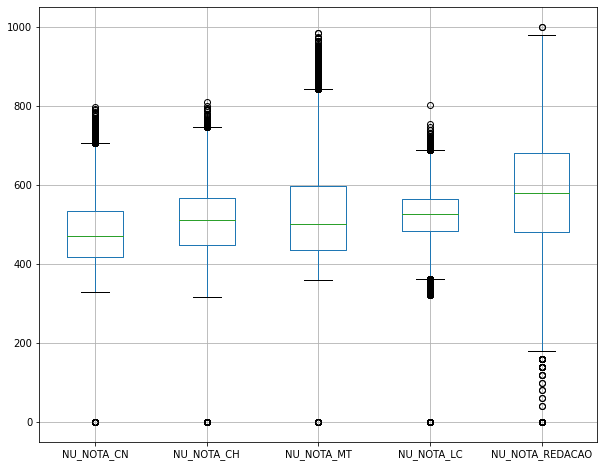

In [ ]:
dados[provas].boxplot(grid=True, figsize= (10,8))

Usado query() podemos passar funções para localizar dados específicos, neste caso temos os dados dos inscritos por idade na faixa etaria de 13 anos.

In [ ]:
dados.query("NU_IDADE == 13")

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
57359,190003297248,2019,3504107,Atibaia,35,SP,13,F,1,1,1,3556701.0,Vinhedo,35.0,SP,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CAEBCEBECAABCDBEEAEDDBCBACBCECAABDCACEABAEADC,BAAEC99999BCCDDEDACBAADECADBEADBADDBECADEBCBDA...,AABDCEACDDBEDABDDACBDECABACDDBAECDBECBBDEBCDA,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,200.0,200.0,200.0,160.0,920.0,E,G,C,D,3,F,A,C,C,B,A,B,B,B,A,B,A,A,B,A,A,D,B,B,B
95630,190004825557,2019,5107602,Rondonópolis,51,MT,13,M,1,1,1,5107602.0,Rondonópolis,51.0,MT,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,D,3,F,A,B,C,B,A,B,A,A,A,A,A,A,B,B,A,B,A,A,B
98197,190004926952,2019,1600303,Macapá,16,AP,13,M,1,3,1,1600303.0,Macapá,16.0,AP,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,E,D,B,4,K,B,C,D,B,A,B,B,B,B,B,A,A,C,B,A,E,A,B,B
116501,190005659236,2019,2917508,Jacobina,29,BA,13,M,1,3,1,2304400.0,Fortaleza,23.0,CE,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ADCCCCDCEAAABCEEEDAD*CCCDEBADCDBBBCBEBDBDBECC,EBBAD99999BDCBCCBCEBBCADEDDEDECDECDECECACDCECC...,ECEADDBBABCCCDBDCAAECABDCBDBCECCECABCABBBCBAA,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,100.0,80.0,100.0,500.0,D,F,D,B,4,D,A,E,E,C,A,B,A,B,A,B,A,A,D,A,B,C,B,C,B


Aqui filtramos os dados com idade menor ou igual a 14 anos e estado de residência. Usando o normalize obtivemos o percentual de alunos dessa idade em cada estado.

In [ ]:
dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts(normalize=True)

PE    0.124138
CE    0.103448
BA    0.096552
PA    0.082759
SP    0.075862
MG    0.075862
MA    0.062069
PB    0.048276
GO    0.048276
PI    0.048276
DF    0.027586
AM    0.027586
MT    0.027586
SE    0.020690
TO    0.020690
PR    0.020690
SC    0.013793
AL    0.013793
RO    0.013793
RS    0.006897
RN    0.006897
MS    0.006897
RJ    0.006897
ES    0.006897
AP    0.006897
AC    0.006897
Name: SG_UF_RESIDENCIA, dtype: float64

# Extração dados com seaborn e matplotlib:

Para visualização de dados através de gráficos importamos o matplotlib, uma biblioteca que cria gráficos utilizando a linguagem python e sua extensão de matemática NumPy.

Para saber mais:
https://matplotlib.org/

Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

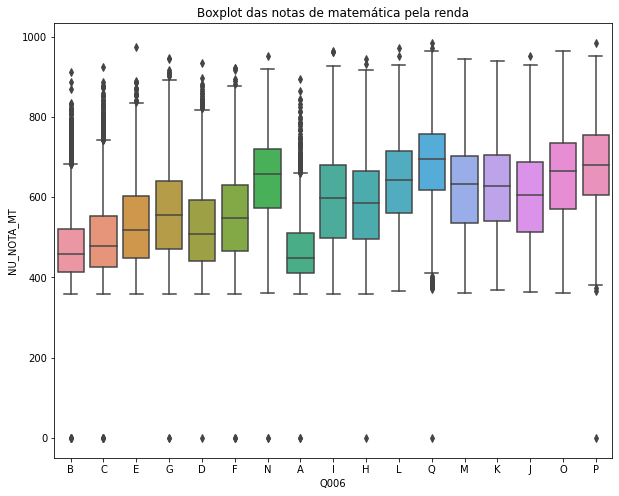

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_MT", data = dados)
plt.title("Boxplot das notas de matemática pela renda")

In [ ]:
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()

In [ ]:
dados["Q006"].unique()

array(['B', 'C', 'E', 'G', 'D', 'F', 'N', 'A', 'I', 'H', 'L', 'Q', 'M',
       'K', 'J', 'O', 'P'], dtype=object)

Aqui temos todas as classificaões de renda do enem, que varia de A = 0,00  a  Q= 19.960,00.

In [ ]:
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

Nota de matemática em relação a renda familiar. 

Text(0.5, 1.0, ' Notas de matemática pela renda')

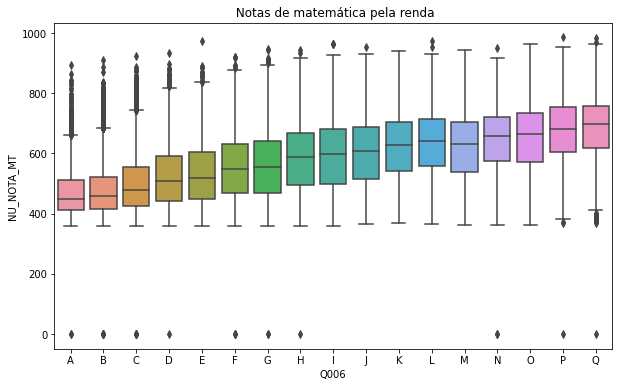

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_MT", data = dados, order = renda_ordenada)
plt.title(" Notas de matemática pela renda")

Criamos uma lista com a soma de todas as notas, gerando uma nota total por aluno.

In [ ]:
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


Este grafico que nos mostra a relação entre a nota total e a renda. 
Observe que a grande maioria dos alunos que tiraram notas *menores* do que 2000, estão somente entre a classe A e C.

Text(0.5, 1.0, 'Nota total em relação a renda')

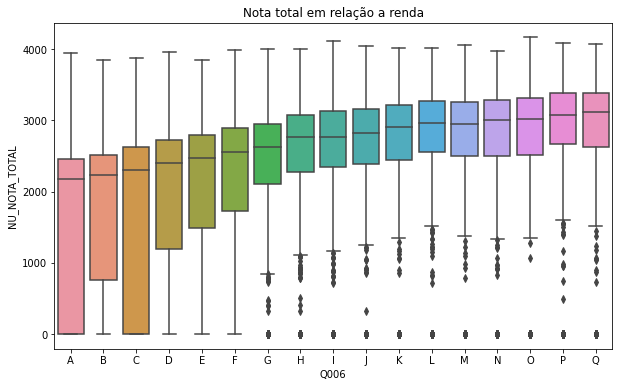

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados, order = renda_ordenada)
plt.title("Nota total em relação a renda")

Provavelmente essa grande quantidade de zeros mostrados pelo displot sejam alunos que não foram a prova ou foram eliminados, e não somente tiraram zero em todas as provas.

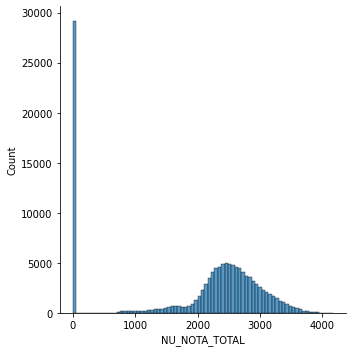

In [ ]:
sns.displot(dados, x ="NU_NOTA_TOTAL")

Para acessar todas as provas que tiveram resultado igual a zero, acessamos a lista e através do query() filtramos as notas totais zeradas.



In [ ]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
provas.append("NU_NOTA_TOTAL")
dados[provas].query("NU_NOTA_TOTAL == 0")

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


Alunos que faltam a prova de matemática.

In [ ]:
presenca_mt= dados.query("TP_PRESENCA_MT == 0")
presenca_mt.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
10,190001005028,2019,1506807,Santarém,15,PA,28,F,2,3,1,1506807.0,Santarém,15.0,PA,1,9,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,B,A,B,2,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,A,0.0
11,190001005057,2019,1501709,Bragança,15,PA,36,F,1,3,1,1501709.0,Bragança,15.0,PA,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,A,A,4,B,A,B,D,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,B,0.0
26,190001005484,2019,1504208,Marabá,15,PA,26,M,2,3,1,1721208.0,Tocantinópolis,17.0,TO,1,8,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,B,C,C,2,C,A,B,B,A,A,B,A,A,A,B,A,A,B,A,A,C,A,B,B,0.0
38,190001006086,2019,1508126,Ulianópolis,15,PA,29,F,1,3,1,2108108.0,Paulo Ramos,21.0,MA,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,A,5,C,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,C,A,A,B,0.0


#Análise de dados, diferenças sociais e de genero.


Criamos uma variável para todas as provas que não estavam zeradas e então podemos começar a análise.

In [ ]:
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_notas_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


Podemos então utilizar a nota total de cada aluno para avaliar as correlações que possam existir entre os outros tipos de dados.

Text(0.5, 1.0, 'Nota total pela renda')

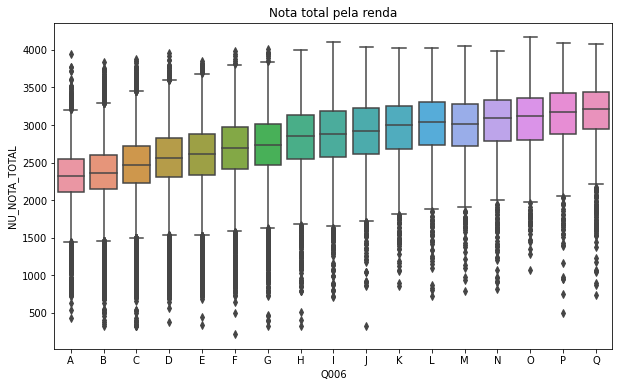

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero,order = renda_ordenada)
plt.title("Nota total pela renda")

Com este gráfico podemos observar a diferença entre as notas de treineiros de baixa renda e de rendas mais altas.

Text(0.5, 1.0, 'Nota total pela renda de treineiros e não treineiros')

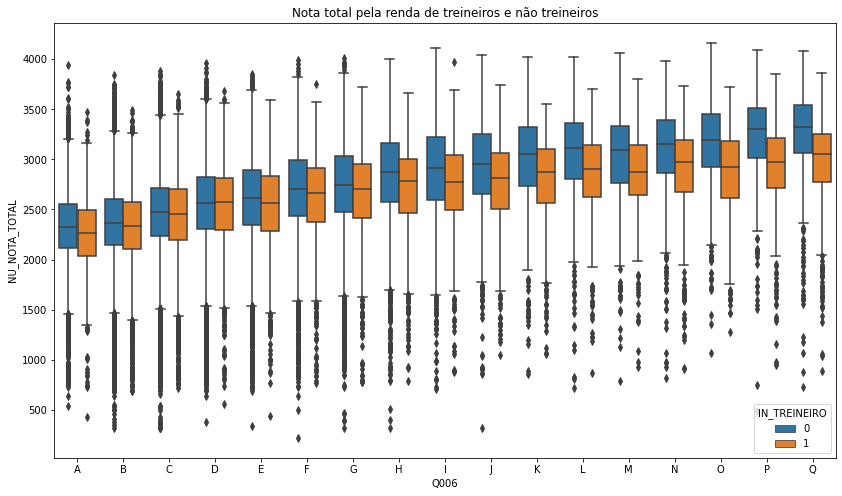

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, 
            hue = "IN_TREINEIRO", order = renda_ordenada)
plt.title("Nota total pela renda de treineiros e não treineiros")

Dados sobre a diferença das notas entre homens e mulheres de baixa renda.

Perceba que as notas das mulheres só conseguem chegar ao ponto máximo da média das notas dos homens, a partir da renda  familia F , que corresponde a no máximo 2900,00 reais. 

Observe que a partir da renda familiar contida em K, mantem-se um padrão de notas dispersas masculinas menores do que as femininas. Observe que de K a Q as mulheres se mantem numa faixa de 500 pontos acima dos homens, o intervalo correspondente a 500 e 1500 pontos. 

Text(0.5, 1.0, 'Nota total pela renda: homens vs mulheres')

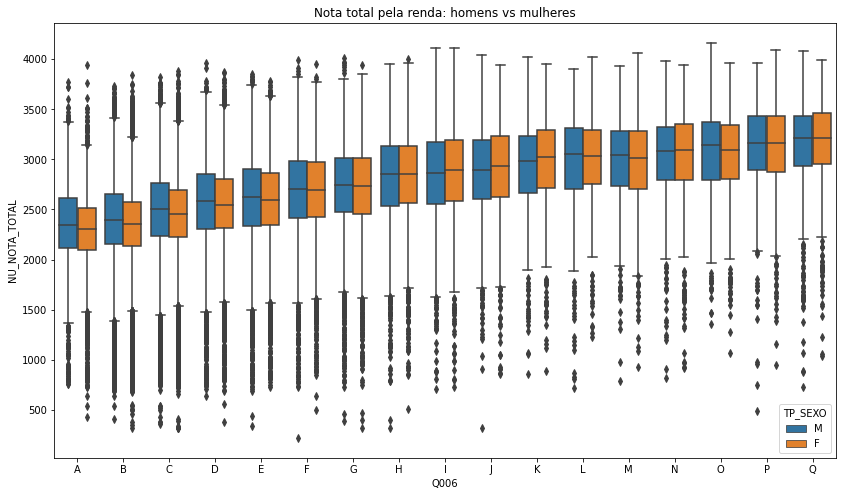

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, 
            hue = "TP_SEXO", order = renda_ordenada)
plt.title("Nota total pela renda: homens vs mulheres")

O método histplot() cria um novo histograma das colunas do Data.Frame, usando uma coluna para cada "bar".

Para saber mais:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html



Nota total vs volume de inscritos.


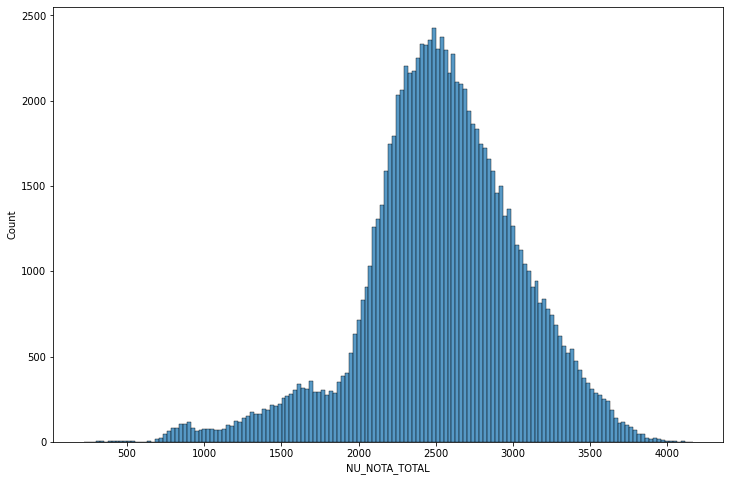

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL")

Nota de matemática e volume de inscritos.

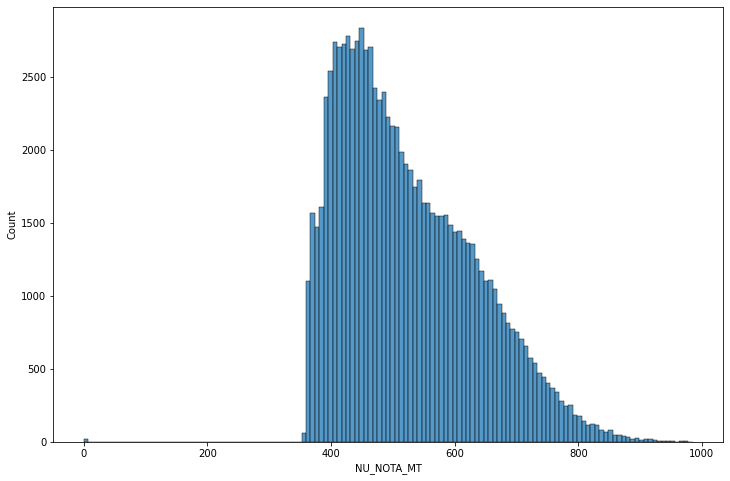

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_MT")

Nota de linguagens e códigos vs volume de inscritos.

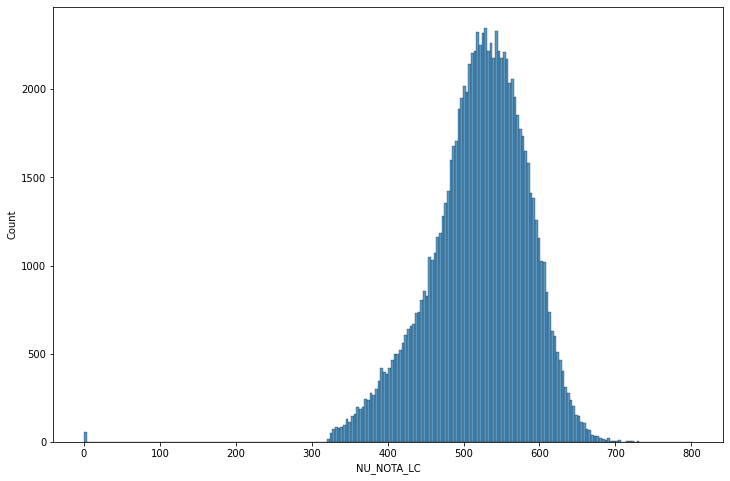

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_LC")

O parametro hue receberá um agrupamento de dados conforme a chave passsada por parametro.

Podemos observar neste gráfico de nota total e volume de incritos dividos pelo sexo, que nesta parte da mostra as mulheres obtem notas maiores que os homens.

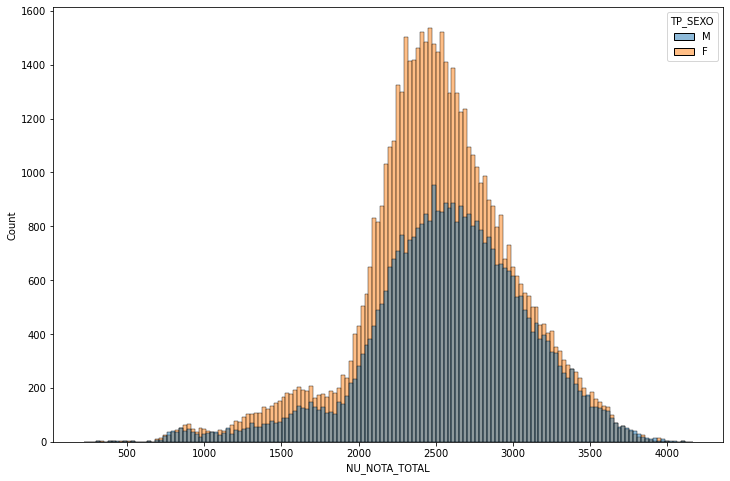

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="TP_SEXO")

O parametro Kde retorna estimativas de densidade entre as colunas analisadas no gráfico.

Para saber mais:
https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.plot.kde.html

Número de inscritos pela nota total que possuem ou não acesso a internet:

Gráfico de densidade das notas totais com ou sem acesso a internet.

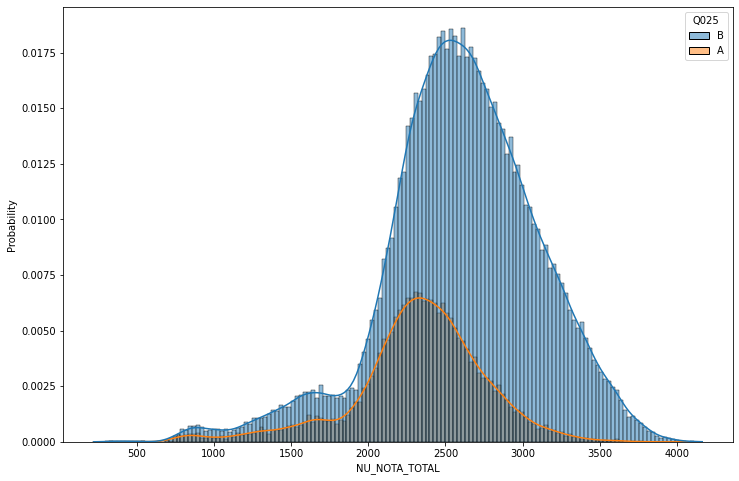

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="probability")

Filtragem dos dados das mulheres.

In [ ]:
dados_notas_mulheres = dados_sem_notas_zero.query("TP_SEXO == 'F'")
dados_notas_mulheres.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5
5,190001004841,2019,1503606,Itaituba,15,PA,18,F,1,3,1,1503606.0,Itaituba,15.0,PA,2,0,2,1.0,0,15152120.0,1503606.0,Itaituba,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEDBCBABDDBDCDDEECDEEEBECBCCDEBDACDDEAD...,EEBBACCDBAABCEDECEABCAEAEADEBBACCAADBCEBEADDB,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,200.0,200.0,200.0,160.0,900.0,D,E,B,C,2,C,A,B,C,A,C,B,B,A,A,B,A,A,B,A,A,D,A,B,B,3301.4
6,190001004856,2019,1501402,Belém,15,PA,21,F,1,3,1,1508308.0,Viseu,15.0,PA,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CBBBBBCDBCCEDCDEABDBDECDEC.DEDACEEACDCECE...,DCCCAABCCBECCCDACBDECDCDCBBCECCBCECBCABBCCCEB,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,140.0,140.0,180.0,180.0,760.0,H,H,A,A,2,C,A,C,D,A,A,B,B,B,A,B,A,A,C,A,A,C,B,A,B,2599.5


Dados Sobre a nota total vs raça.

(0.0, 5.0)

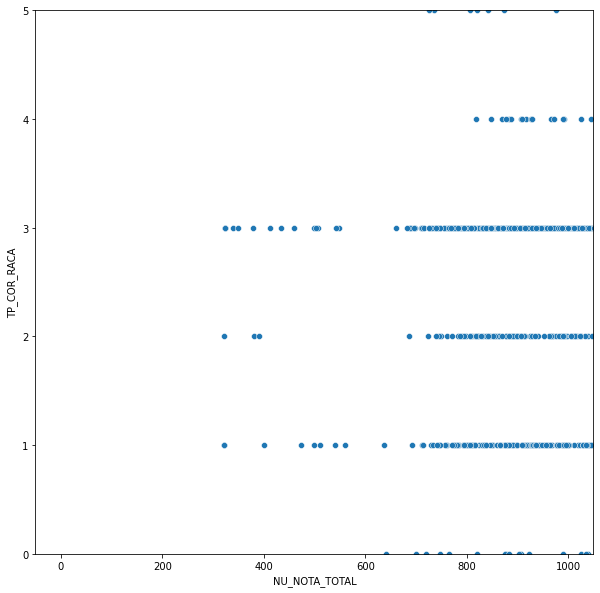

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data= dados_notas_mulheres, x="NU_NOTA_TOTAL", y="TP_COR_RACA")
plt.xlim((-50, 1050))
plt.ylim((0, 5))

Este gráfico mostra o agrupamento das notas de ciencias naturais e nas de linguagens e códigos destacando sexo.
Podemos observar que nesta mostra, os homens tiveram notas maiores em ciêcias naturais, e mantiveram um comportamento parecido com as notas de liguagens e códigos, porem menos intenso. 

(-50.0, 1050.0)

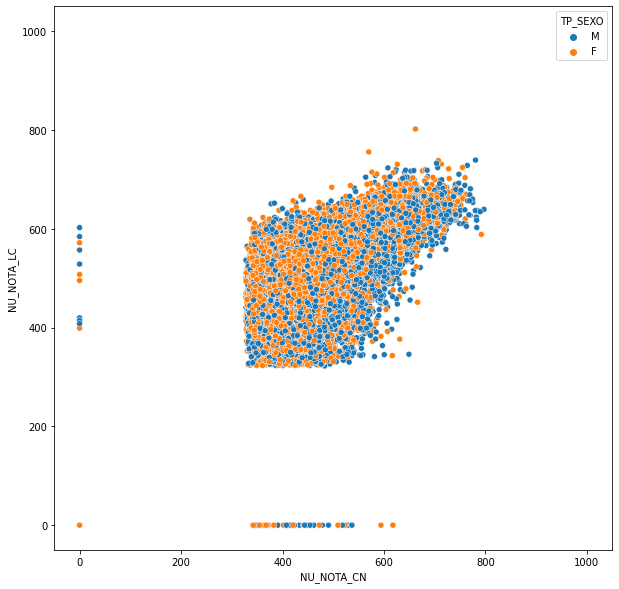

In [ ]:

plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_sem_notas_zero, x="NU_NOTA_CN", y="NU_NOTA_LC", hue="TP_SEXO")
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

Filtragem de notas alunos com nota zero.

In [ ]:
dados_com_nota_zero = dados.query("NU_NOTA_TOTAL == 0")
dados_com_nota_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
10,190001005028,2019,1506807,Santarém,15,PA,28,F,2,3,1,1506807.0,Santarém,15.0,PA,1,9,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,B,A,B,2,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,A,0.0
11,190001005057,2019,1501709,Bragança,15,PA,36,F,1,3,1,1501709.0,Bragança,15.0,PA,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,A,A,4,B,A,B,D,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,B,0.0
26,190001005484,2019,1504208,Marabá,15,PA,26,M,2,3,1,1721208.0,Tocantinópolis,17.0,TO,1,8,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,B,C,C,2,C,A,B,B,A,A,B,A,A,A,B,A,A,B,A,A,C,A,B,B,0.0
38,190001006086,2019,1508126,Ulianópolis,15,PA,29,F,1,3,1,2108108.0,Paulo Ramos,21.0,MA,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,A,5,C,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,C,A,A,B,0.0
40,190001006292,2019,1504422,Marituba,15,PA,24,M,1,1,1,1504422.0,Marituba,15.0,PA,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,F,B,6,G,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,D,A,A,B,0.0


O grafo abaixo relaciona notas de matematica e notas de redação usando como parametro o sexo do participante.

Podemos fazer uma analise sobre como cria-se uma divisão entre as maiores notas de matematica entre homens e mulheres. 
Já nas notas de redação percebe-se que o contraste parece ser bem menor, podemos observar então uma divisão um pouco mais igualitária dos resultados.

(-50.0, 1050.0)

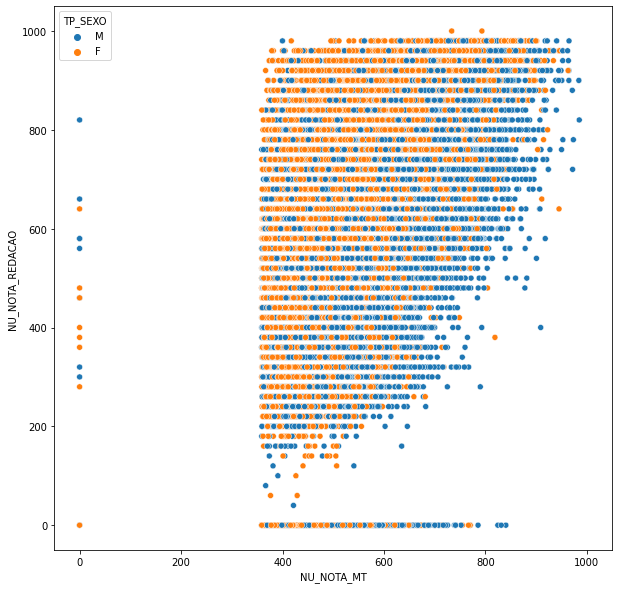

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_sem_notas_zero, x="NU_NOTA_MT", y="NU_NOTA_REDACAO", hue="TP_SEXO")
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

In [ ]:
provas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_MT',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'NU_NOTA_TOTAL']

Com o pair.plot() podemos analisar os gráficos de cada nota e também da nota total.

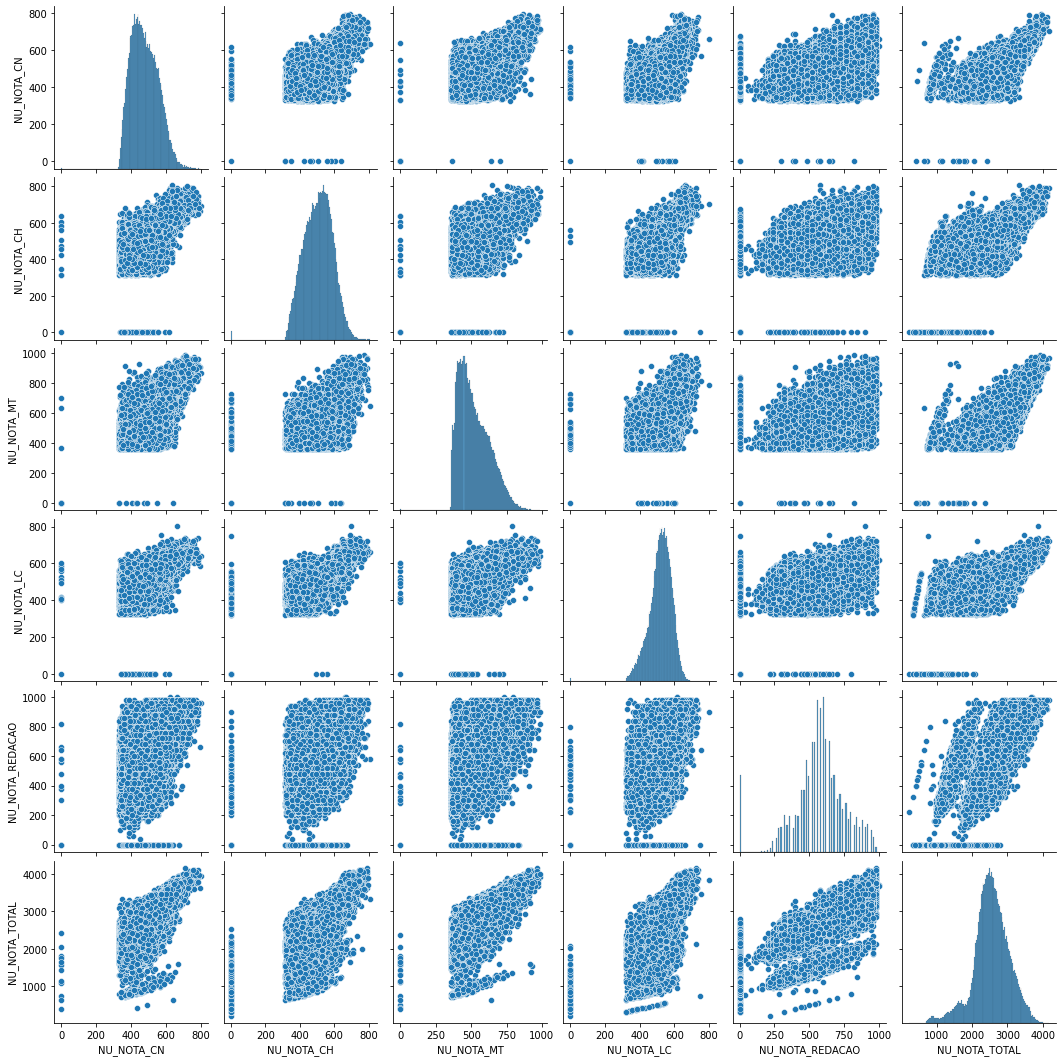

In [ ]:
sns.pairplot(dados_sem_notas_zero[provas])

Para obter a correlação geral de todas as notas usamos o método corr().

Para saber mais:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html

In [ ]:
correlacao = dados_sem_notas_zero[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740,0.785600
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338,0.735534
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046,0.790051
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797,0.711686
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000,0.783647
NU_NOTA_TOTAL,0.785600,0.735534,0.790051,0.711686,0.783647,1.000000


# Machine Learning 

Machine Learning, em tradução literal significa "Aprendizado de Máquina". É um campo da inteligência artifícial para desenvolver modelos de previsão, que podem ser divídidos em modelos de classifcação e de regressão. Nos modelos de classificação buscamos classificar os dados a partir da observaçãão de agrupamento dos dados, já nos modelos de regressão buscamos prever valores numéricos específicos a partir dos dados existentes. 

Para saber mais: 
https://algorithmia.com/blog/the-importance-of-machine-learning-data

In [ ]:
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_notas_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


In [ ]:
provas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_MT',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'NU_NOTA_TOTAL']

Aqui começamos a criar nossas projeções de comportamento dos dados através de um modelo de regressão. Temos todas as provas de entrada, que são as provas coletadas do ano de 2019 e a prova de saída que será uma previsão do modelo para a nota de matemática com base nas notas anteriores. 
Para limpeza dos dados usamos o dropna().

Para saber mais: 
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.dropna.html

In [ ]:
provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"
dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna()
notas_entrada = dados_sem_notas_zero[provas_entrada]
notas_saida = dados_sem_notas_zero[prova_saida]



As notas de entrada são as notas totais de cada matéria presentes em nossa mostra, exceto a de matemática que o modelo tentará prever. 

In [ ]:
notas_entrada

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
0,512.3,488.6,435.6,420.0
2,499.1,441.0,423.2,560.0
3,578.1,551.5,426.2,500.0
4,571.3,511.2,516.5,780.0
5,618.7,607.5,559.6,900.0
...,...,...,...,...
127373,501.5,485.3,480.4,520.0
127375,559.6,525.7,502.4,740.0
127376,380.9,450.3,449.1,520.0
127378,416.2,517.3,564.7,620.0


Aqui definimos x e y para dar início ao modelo. Para plotagem de gráficos de predições, o x recebe as notas de entrada e o Y recebe as notas de saída.




In [ ]:
x = notas_entrada
y = notas_saida 

O sklearn é uma biblioteca de aprendizado de maquina para linguagem python. O train_test_split é chamado para fazer predições e nos fornece uma variável de treino e outra de teste. A variável de treino vai usar os dados que o modelo já conhece para treina-lo, já a variável teste vai testar o quão bem o modelo lida com os dados novos.

Para saber mais:
https://scikit-learn.org/stable/

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25,
                                                        random_state=SEED)

Aqui usamos a LinearSVR, regressão de vetor de suporte linear, uma ferramenta que escala bem grandes quantidades de mostras e também permite um aprendizado melhor do modelo, que tende a generalizar menos e criar uma projeção mais próxima da realidade.

Para saber mais:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html

In [ ]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=4321, tol=0.0001, verbose=0)

Para criar o modelo de predição passamos por parametro o x_teste, que testará as notas de entrada do modelo. 

In [ ]:
predicoes_matematica = modelo.predict(x_teste)

Aqui passamos o y_teste, que é um teste do resultado da nota de matemática prevista pelo nosso modelo. 

In [ ]:
y_teste[:5]

114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
Name: NU_NOTA_MT, dtype: float64

Plotamos então um gráfico de dispersão sobre a nota de matemática prevista pelo nosso modelo. 

Para saber mais:

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Gráfico de nota de entrada teste e nota de saída teste:

(-50.0, 1050.0)

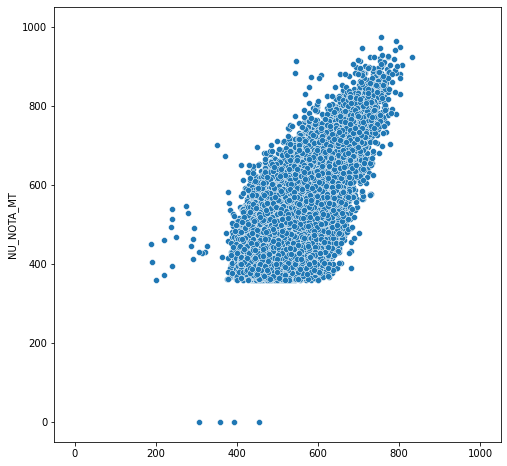

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=predicoes_matematica, y=y_teste)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

Aqui temos um gráfico da nota de saída teste (prova de matemática) em relação a prova de saída menos o teste com a nota de entrada:

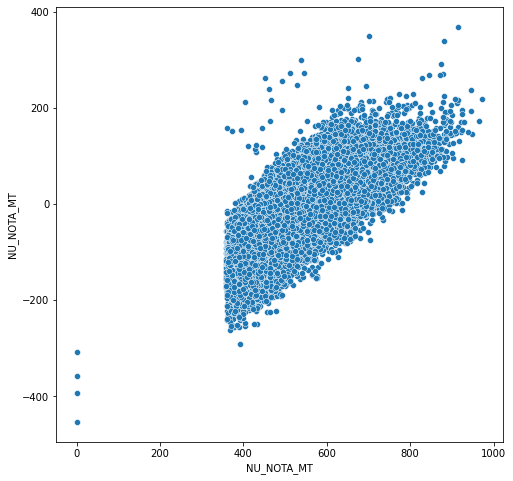

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=y_teste - predicoes_matematica)


Relação notas de saída testadas e notas de entrada testadas:

(-50.0, 1050.0)

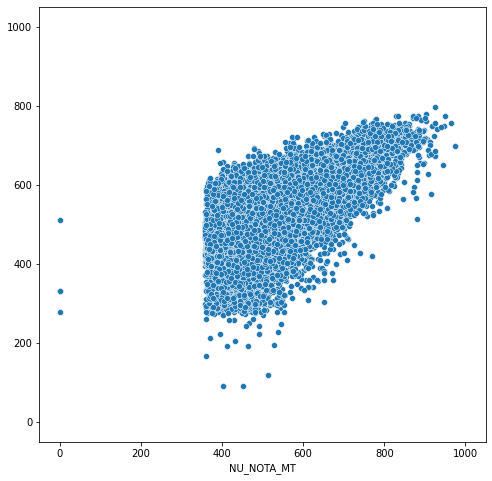

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=x_teste.mean(axis=1))
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

Aqui criamos novas listas no DataFrame para obter os valores reais, os valores de predição, a diferença entre a prova real e a prova prevista pelo modelo. Precisamos apenas calcular o quadrado da diferença para estabilizar os valores em positivo.

In [ ]:
resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados["Previsao"] = predicoes_matematica
resultados["diferenca"] = resultados["Real"] - resultados["Previsao"]
resultados["quadrado_diferenca"] = (resultados["Real"] - resultados["Previsao"])**2

In [ ]:
resultados

,Real,Previsao,diferenca,quadrado_diferenca
114991,459.7,564.486105,-104.786105,10980.127878
104685,617.2,628.305027,-11.105027,123.321625
91028,520.0,509.980986,10.019014,100.380650
115802,703.8,593.681144,110.118856,12126.162420
93303,627.1,579.784588,47.315412,2238.748252
...,...,...,...,...
81393,688.6,626.291851,62.308149,3882.305380
40159,479.1,652.313922,-173.213922,30003.062777
64083,501.4,607.787172,-106.387172,11318.230438
84661,772.5,734.227663,38.272337,1464.771772


Para obter a média dos valores de um eixo específico, como o quadrado da diferença usamos o método mean().

Para saber mais: 
https://www.geeksforgeeks.org/python-pandas-dataframe-mean/

In [ ]:
resultados["quadrado_diferenca"].mean()

6604.415306219529

Perceba que o valor da média ficou muito longe da realidade de nossos dados, para estabilizar então podemos utilizar a raiz quadrada.

In [ ]:
resultados["quadrado_diferenca"].mean()**(1/2)

81.26755383435341

A função DummyRegressor executa regressões com regras básica como média, mediana e quantil.

Para saber mais:
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

In [ ]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_predicoes)

12063.645588509502

In [ ]:
mean_squared_error(y_teste, predicoes_matematica)

6604.41530621957

Neste momento começamos começamos a criar mais linhas para teste do modelo. Neste caso usaremos a modelo DecisionTreeRegressor, que cria uma arvore de regreção baseada em mais linhas de comportamento dos dados.

Para saber mais:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [ ]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state=SEED)
modelo.fit(x_treino, y_treino)
predicoes_matematica = modelo.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematica)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


6604.41530621957

In [ ]:
from sklearn.tree import DecisionTreeRegressor

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25)
modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
predicoes_matematica_arvore = modelo_arvore.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematica_arvore)


6039.5736602245215

Para avaliar as métricas através de colunas cruzadas, importamos a função cross_validade:




In [ ]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()



Perceba que aqui tentamos descobrir o intervalo de confiança e ele pareceu bem maior do que o esperado:

In [ ]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()
desvio_padrao = (resultados["test_score"]*-1).std()
lim_inferior = media - (2*desvio_padrao)
lim_superior = media + (2*desvio_padrao)

print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

Intervalo de confiança 6015.722549536811 - 7100.73277978073


Aqui temos as próximas possíveis notas de matemática:

In [ ]:
resultados["test_score"]*-1

array([6118.6911947 , 6536.09830186, 6338.64260896, 6456.70685686,
       6234.97203593, 6794.25120283, 6713.45694262, 6693.04880297,
       6610.58461646, 7085.82408339])

Para calcular nosso intervalo de confiança criamos uma função, passando por parametro nossos resultados com formulas para estabilização dos valores.

In [ ]:
def calcula_mse(resultados):
    media = (resultados["test_score"]*-1).mean()
    desvio_padrao = (resultados["test_score"]*-1).std()
    lim_inferior = media - (2*desvio_padrao)
    lim_superior = media + (2*desvio_padrao)
    print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

Perceba que agora obtemos um intervalo de confiança bem menor, o que trás mais segurança quanto a acertividade do modelo.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import numpy as np

SEED= 1232
np.random.seed(SEED)



partes = KFold(n_splits = 10, shuffle=True)
modelo_arvore = DecisionTreeRegressor(max_depth=3)
resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error")
calcula_mse(resultados)

Intervalo de confiança 5858.741842392759 - 6250.793292491384


In [ ]:
def regressor_arvore(nivel):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Treino = {(resultados['train_score']*-1).mean()}|Teste = {(resultados['test_score']*-1).mean()}")

regressor_arvore(4)

Treino = 5760.834451245899|Teste = 5815.707286597402


Aqui temos os resultados de treino e teste num range de 1 a 20 e podemos ver uma pequena diferença entre a nota prevista pelo treino e pelo teste. Isso nos mostra que nosso modelo ficou numa média bem próxima da realidade:

In [ ]:
for i in range(1,21):
    regressor_arvore(i)

Treino = 7844.952652412207|Teste = 7857.871770206351
Treino = 6527.783475408351|Teste = 6556.886287657656
Treino = 6021.275229419075|Teste = 6054.767567442072
Treino = 5760.834451245899|Teste = 5815.707286597402
Treino = 5598.158955426787|Teste = 5675.196789060744
Treino = 5469.677369145869|Teste = 5593.304363812442
Treino = 5369.458309852721|Teste = 5541.646599457925
Treino = 5276.16965707928|Teste = 5542.053091078966
Treino = 5166.713159932668|Teste = 5608.390265709719
Treino = 5022.598049115693|Teste = 5761.4934268457555
Treino = 4833.560706021637|Teste = 5955.331403579403
Treino = 4598.125022484774|Teste = 6217.553668629227
Treino = 4316.3791662866815|Teste = 6521.403312280134
Treino = 4000.6209880837496|Teste = 6853.984106997142
Treino = 3655.8197526274853|Teste = 7224.863053512405
Treino = 3295.832684540846|Teste = 7636.168819779455
Treino = 2931.7212612043877|Teste = 8071.851486256819
Treino = 2575.59534021339|Teste = 8452.126711298857
Treino = 2233.574203221172|Teste = 8833.470

# Participação das mulheres no Enem/2019

Como mulher tenho uma grande curiosidade em saber como é o desempenho das mulheres nos vestibulares e quais seriam os motivos para termos tão poucas mulheres nos cursos de ciências exatas. Neste estudo levantei as seguintes questões:

*   Como a posição social pode afetar o resultado das notas das mulheres?
*   Como essas notas se relacionam com as notas dos homens?
*   E a diferença social, interfere no nota das mulheres?

Também me pergunto se as diferenças sociais afetam mais profundamente as mulheres em momentos decisivos de suas vidas como por exemplo, na a gestação. Afinal, ela poderia afetar as notas das alunas?

*   Quantas mulheres realizaram a prova na condição de gestantes ou lactantes? 
*   Quantos anos ou que renda possuiam as mulheres que fizeram a prova na condição de gestantes?
*   Qual é o estado com mais mulheres gestantes participando da prova?








# Análise da participação das mulheres:

Comecei analisando a porcentagem de mulheres participantes da prova por estado e idade:

In [ ]:
dados.query("TP_SEXO == 'F'")[["SG_UF_RESIDENCIA", "NU_IDADE"]].value_counts(normalize=True)

SG_UF_RESIDENCIA  NU_IDADE
SP                17          0.044055
                  18          0.028307
MG                18          0.019411
                  17          0.017685
SP                19          0.015695
                                ...   
MA                66          0.000013
                  62          0.000013
                  61          0.000013
                  57          0.000013
AC                14          0.000013
Length: 1237, dtype: float64

Aqui filtei apenas as notas da mulheres, incluindo as notas zero.

In [ ]:

mulheres_notas = dados.query("TP_SEXO == 'F'")
mulheres_notas.head()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5
5,190001004841,2019,1503606,Itaituba,15,PA,18,F,1,3,1,1503606.0,Itaituba,15.0,PA,2,0,2,1.0,0,15152120.0,1503606.0,Itaituba,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEDBCBABDDBDCDDEECDEEEBECBCCDEBDACDDEAD...,EEBBACCDBAABCEDECEABCAEAEADEBBACCAADBCEBEADDB,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,200.0,200.0,200.0,160.0,900.0,D,E,B,C,2,C,A,B,C,A,C,B,B,A,A,B,A,A,B,A,A,D,A,B,B,3301.4
6,190001004856,2019,1501402,Belém,15,PA,21,F,1,3,1,1508308.0,Viseu,15.0,PA,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CBBBBBCDBCCEDCDEABDBDECDEC.DEDACEEACDCECE...,DCCCAABCCBECCCDACBDECDCDCBBCECCBCECBCABBCCCEB,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,140.0,140.0,180.0,180.0,760.0,H,H,A,A,2,C,A,C,D,A,A,B,B,B,A,B,A,A,C,A,A,C,B,A,B,2599.5


Perceba que a nota total das mulhers gestantes fica bem abaixo da nota das demais participantes. Note também que as mulheres que fizeram a prova em condição de gestantes ficam apenas nos grupos com rendas inferiores á 3.000,00 reais:

Text(0.5, 1.0, 'Nota total das mulheres gestantes e não gestantes')

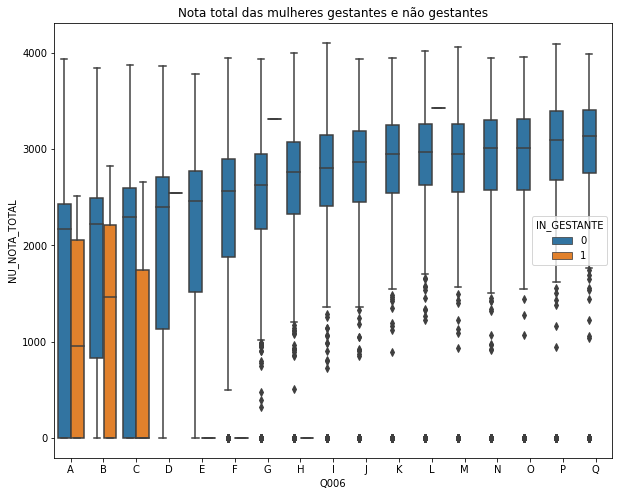

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = mulheres_notas, hue="IN_GESTANTE", order = renda_ordenada)
plt.title("Nota total das mulheres gestantes e não gestantes")

Aqui criei uma nova coluna com os a renda somente das mulheres. 

In [ ]:
dados_notas_mulheres["NU_RENDA_MULHERES"] = dados_notas_mulheres["Q006"]
dados_notas_mulheres["NU_RENDA_MULHERES"].describe()



count     58548
unique       17
top           B
freq      15773
Name: NU_RENDA_MULHERES, dtype: object

Gráfico da nota total das mulheres. Observe que nessa mostra não temos mulheres com notas inferiores a 200 pontos.

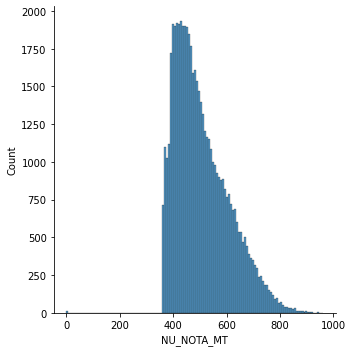

In [ ]:
sns.displot(dados_notas_mulheres, x ="NU_NOTA_MT")

Usando o pairplot podemos observar os gráficos de todas as notas das mulheres, incluindo gráfico de nota total. 

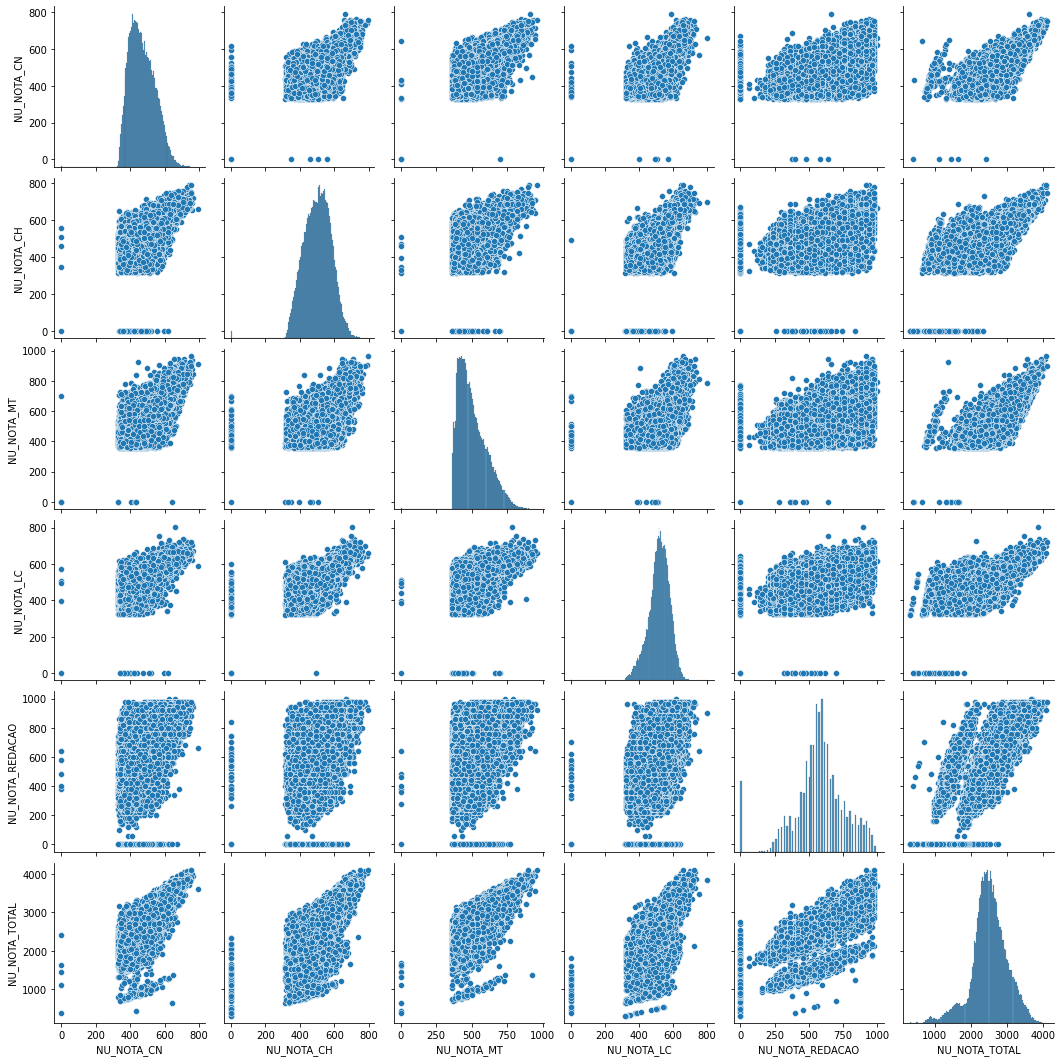

In [ ]:
sns.pairplot(dados_notas_mulheres[provas])

Neste histplot podemos observar a renda das mulheres que participaram da prova. Note que a grande maioria das mulheres que participaram da prova possuem renda entre 985,00 e 1.900,00 reais:

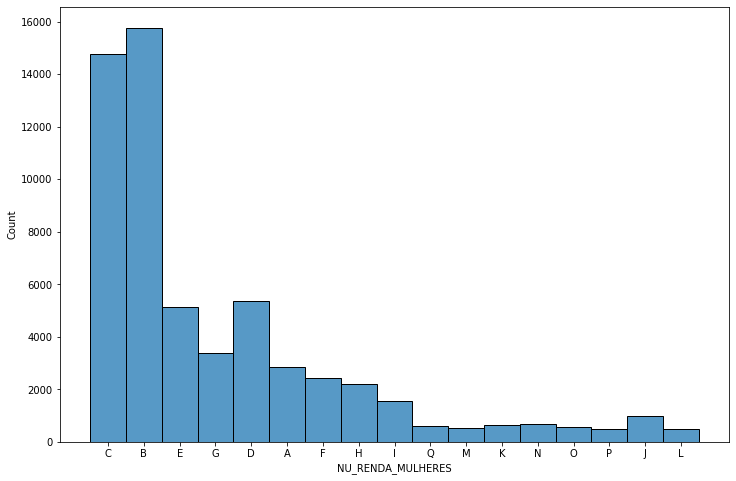

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_notas_mulheres , x = "NU_RENDA_MULHERES")

Podemos observar o quanto a desigualdade impacta a vida das mulheres em diversos aspectos de suas vidas. Este gráfico nos mostra o desempenho de mulheres gestantes na prova de matemática. Observe que as mulheres gestantes possuem renda entre A e D. Ou seja, suas familias tem renda 0 ou no maximo 1996,00. Isso pode nos ajudar entender como a grávidez na adolescencia está presente somente nas classessociais mais baixas da sociedade.

Text(0.5, 1.0, 'Nota de matemática pela renda, mulheres gestantes')

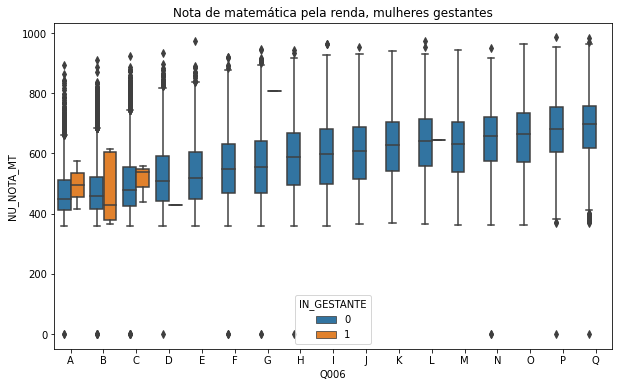

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Q006", y="NU_NOTA_MT", data= dados, hue="IN_GESTANTE", order=renda_ordenada)
plt.title("Nota de matemática pela renda, mulheres gestantes")

Total de mulheres gestantes que participaram da prova, presentes na mostra de dados que estamos analisando:

In [ ]:
len(dados.query("IN_GESTANTE == 1")[["SG_UF_RESIDENCIA", "NU_IDADE"]].value_counts().sort_index())

30

Aqui filtramos os dados de residencia e idade somente das mulheres gestantes . 

In [ ]:
dados.query("IN_GESTANTE == 1")[["SG_UF_RESIDENCIA", "NU_IDADE"]].value_counts().sort_index()

SG_UF_RESIDENCIA  NU_IDADE
AM                30          1
AP                22          1
BA                18          2
                  22          1
                  24          2
                  25          1
                  28          1
                  29          1
CE                15          1
                  18          1
ES                18          1
GO                23          1
                  28          1
MA                21          1
                  29          1
MG                19          1
MT                24          1
PA                30          1
                  31          1
PB                18          1
                  27          1
PI                16          1
                  20          1
RJ                33          1
RS                23          1
                  25          1
SP                18          1
                  21          1
                  36          1
TO                22          1
dtype: int64

Total de mulheres lactantes que participaram da prova:

In [ ]:
len(dados.query("IN_LACTANTE == 1")[["NU_IDADE"]].value_counts().sort_index())

26

Dados das mulheres gestantes que participaram da prova:


In [ ]:
alunas_gestantes = dados.query("IN_GESTANTE == 1")
alunas_gestantes.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
1007,190001043663,2019,1504604,Mocajuba,15,PA,30,F,1,3,2,NaN,NaN,NaN,NaN,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABDCC99999CBCABCCAAEEDBADAADBCEACBDCDBACEBADDD...,BECCBAEBBBABDAACEACADACADBBCDDAEBEACDBACAECDE,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,100.0,80.0,80.0,20.0,400.0,B,B,A,A,5,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2169.0
2161,190001088416,2019,1302603,Manaus,13,AM,30,F,0,3,1,1506807.0,Santarém,15.0,PA,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,A,B,3,B,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,0.0
5434,190001217267,2019,1600303,Macapá,16,AP,22,F,1,3,1,1600303.0,Macapá,16.0,AP,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,4,A,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,0.0
5666,190001226357,2019,2927408,Salvador,29,BA,18,F,1,3,1,2927408.0,Salvador,29.0,BA,2,0,2,1.0,0,29181534.0,2927408.0,Salvador,29.0,BA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,F,4,E,A,B,C,A,A,B,A,B,B,A,A,A,B,B,A,D,A,B,B,0.0
6762,190001270693,2019,2910800,Feira de Santana,29,BA,28,F,2,2,1,2910800.0,Feira de Santana,29.0,BA,1,6,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999DEBAADAABCCCADECAACECCADCCDCBACCCACEECECD...,DAACCBEEDEECBCEAABADBEBECACDCADEBDDECCAACBAAA,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,120.0,120.0,120.0,40.0,520.0,B,E,B,F,8,C,A,B,D,B,A,B,A,B,A,A,A,A,B,B,A,B,A,A,B,2331.0


Número de alunas Gestantes por classe social.

Observe que a grande maioria das alunas gravidas pertencem as 3 classes sociais mais baixas.

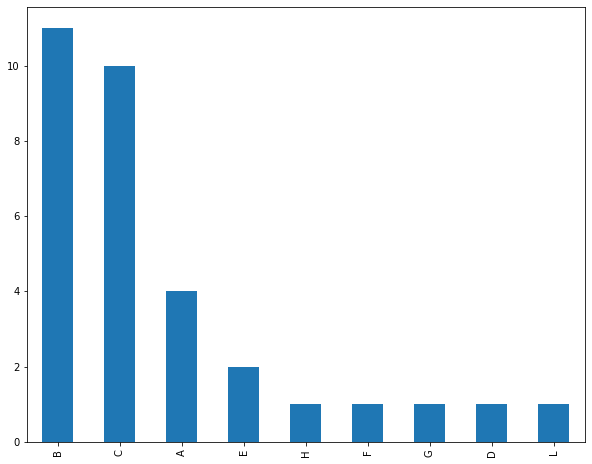

In [ ]:
alunas_gestantes["Q006"].value_counts().plot.bar(figsize=(10,8))

Percentual de alunas gestantes por estado.
Observe que o estado da Bahia possui o maior número de mulheres grávidas a participar da prova, seguido de SP e MA.


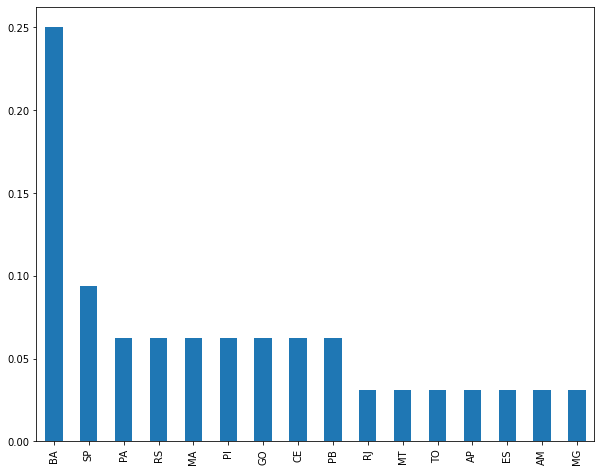

In [ ]:
alunas_gestantes["SG_UF_RESIDENCIA"].value_counts(normalize=True).plot.bar(figsize=(10,8))

Percentual de mulheres gestantes por idade:

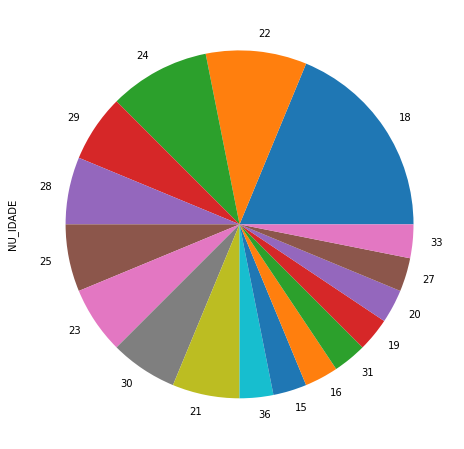

In [ ]:
alunas_gestantes["NU_IDADE"].value_counts(normalize=True).plot.pie(figsize=(10,8))

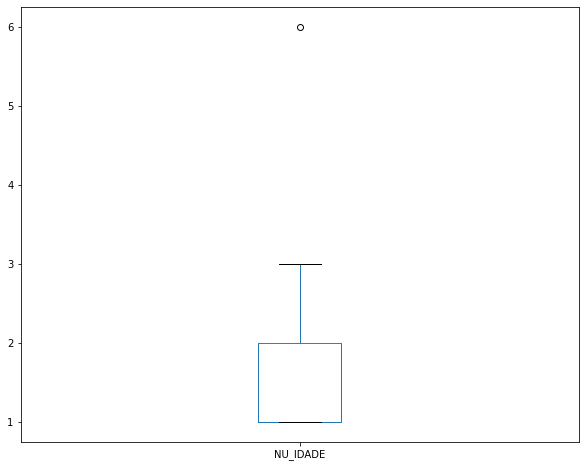

In [ ]:
alunas_gestantes["NU_IDADE"].value_counts().plot.box(figsize=(10,8))

Gestantes que tiraram nota maior do que 700 na prova.

In [ ]:
nota_maior = dados_notas_mulheres.query("NU_NOTA_MT >= 700")
nota_maior.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL,NU_RENDA_MULHERES
177,190001011313,2019,1501402,Belém,15,PA,19,F,1,3,1,1501402.0,Belém,15.0,PA,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,BADECEAADCEBADBBCDBACEDEBDCABCBCECEDDEABCCADB,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,140.0,180.0,180.0,200.0,200.0,900.0,E,G,D,E,3,I,A,B,C,B,A,B,B,A,A,A,A,A,B,A,B,C,A,C,B,3472.4,I
182,190001011415,2019,1501402,Belém,15,PA,17,F,1,2,1,1505536.0,Parauapebas,15.0,PA,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EAABDCCBABCBCDEACECBDDBDCCDECEDBEABEBBCEADCAD,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,120.0,120.0,120.0,140.0,180.0,680.0,F,H,C,F,5,G,A,D,D,A,A,B,A,A,A,B,A,A,B,A,B,E,A,C,B,3135.7,G
321,190001016894,2019,1500800,Ananindeua,15,PA,17,F,1,2,1,1500800.0,Ananindeua,15.0,PA,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,BEBEBBBBDCEBAECCCDBAEEDEBEEABBADACADCCACACBBA,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,200.0,200.0,180.0,200.0,940.0,F,G,D,D,4,K,A,C,D,B,A,B,B,B,A,B,A,A,B,A,A,D,B,B,B,3536.1,K
615,190001028088,2019,1302603,Manaus,13,AM,17,F,1,1,1,1302603.0,Manaus,13.0,AM,2,0,3,1.0,0,13168207.0,1302603.0,Manaus,13.0,AM,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,BAAEAEAADDABACABCDEABEACDDEBECBAECEDCEBCACDDB,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,180.0,200.0,180.0,180.0,200.0,940.0,G,F,E,D,4,Q,C,E,D,D,A,B,B,B,A,B,A,B,E,B,B,E,B,C,B,3551.5,Q
654,190001029665,2019,1302603,Manaus,13,AM,17,F,1,1,1,1302603.0,Manaus,13.0,AM,2,0,2,1.0,0,13027131.0,1302603.0,Manaus,13.0,AM,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,EABADDCBABCBBCDACEDBCAEBCBBECEDCEBAECCDDBBBAA,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,140.0,200.0,160.0,160.0,180.0,840.0,B,E,D,D,4,F,D,C,C,B,A,B,B,B,A,A,A,A,C,B,B,D,B,B,B,3384.4,F


Aqui temos o gráfico das mulheres que tiraram nota maiores ou iguais a 700 filtrados por idade. Note que a maior parte das alunas com essas notas posssuem 17 ou 18 anos, o que talvez possa ser explicado pela idade média para entrar na faculade.

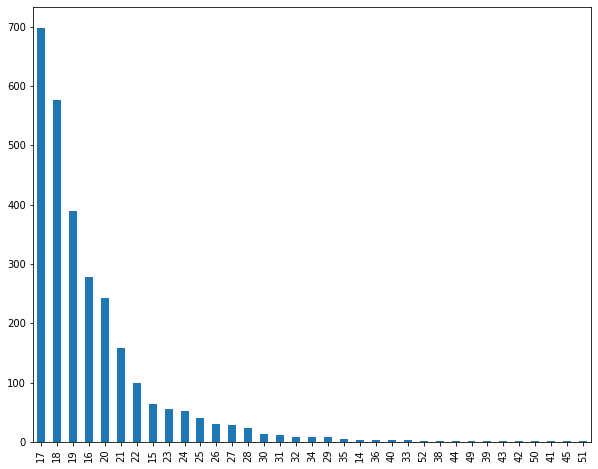

In [ ]:
nota_maior["NU_IDADE"].value_counts().plot.bar(figsize=(10,8))


# Machine Learning:
# Modelo para predição da notas das mulheres na prova de matemática. 

Para filtragem dados usei o query(), e obtive os dados das mulheres que não zeraram a prova.

In [ ]:
dados_notas_mulheres = dados.query("TP_SEXO == 'F' and NU_NOTA_TOTAL > 0")
dados_notas_mulheres.head()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5
5,190001004841,2019,1503606,Itaituba,15,PA,18,F,1,3,1,1503606.0,Itaituba,15.0,PA,2,0,2,1.0,0,15152120.0,1503606.0,Itaituba,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEDBCBABDDBDCDDEECDEEEBECBCCDEBDACDDEAD...,EEBBACCDBAABCEDECEABCAEAEADEBBACCAADBCEBEADDB,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,200.0,200.0,200.0,160.0,900.0,D,E,B,C,2,C,A,B,C,A,C,B,B,A,A,B,A,A,B,A,A,D,A,B,B,3301.4
6,190001004856,2019,1501402,Belém,15,PA,21,F,1,3,1,1508308.0,Viseu,15.0,PA,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CBBBBBCDBCCEDCDEABDBDECDEC.DEDACEEACDCECE...,DCCCAABCCBECCCDACBDECDCDCBBCECCBCECBCABBCCCEB,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,140.0,140.0,180.0,180.0,760.0,H,H,A,A,2,C,A,C,D,A,A,B,B,B,A,B,A,A,C,A,A,C,B,A,B,2599.5


Aqui criamos as notas de entrada e notas de saída, para ter acesso a uma tabela das notas filtradas com os dados das mulheres. 

In [ ]:
provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"
dados_notas_mulheres = dados_notas_mulheres[provas].dropna()
notas_entrada_m = dados_notas_mulheres[provas_entrada]
notas_saida_m = dados_notas_mulheres[prova_saida]


As notas de entrada são as notas do ano de 2019 somente das mulheres.

In [ ]:
notas_entrada_m

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
2,499.1,441.0,423.2,560.0
3,578.1,551.5,426.2,500.0
4,571.3,511.2,516.5,780.0
5,618.7,607.5,559.6,900.0
6,468.7,537.6,391.3,760.0
...,...,...,...,...
127370,372.5,475.1,477.5,0.0
127372,538.7,533.9,403.0,560.0
127373,501.5,485.3,480.4,520.0
127375,559.6,525.7,502.4,740.0


Para plotarmos graficos de predições, o x recebe as notas de entrada e o Y recebe as notas de saída das mulheres.

In [ ]:
x = notas_entrada_m
y = notas_saida_m

Neste momento selecionei o mesmo SEED para obter a mesma sequência de resultados e não dados aleatórios a cada vez que rodo o projeto.

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25,
                                                        random_state=SEED)

In [ ]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=4321, tol=0.0001, verbose=0)

Agora temos nosso modelo de predições das notas de matemática das mulheres. 

In [ ]:
predicoes_matematicas_mulheres = modelo.predict(x_teste)

In [ ]:
y_teste[:5]

109760    514.2
60748     476.4
8560      506.9
22188     602.1
59277     555.9
Name: NU_NOTA_MT, dtype: float64

Com o modelo de notas de matemática pronto, podemos começar a analisar os gráficos de dispersão. 
Observe que as notas mais altas mantém um padrão de menor agrupamento e mais dispersão conforme as notas vão chegando no topo. 
Já o agrupamento de notas baixas começa a partir de 400 pontos em média, enquanto na previsão com dados de homens e mulheres esse agrupamento começava em torno de 350 pontos.


(-50.0, 1050.0)

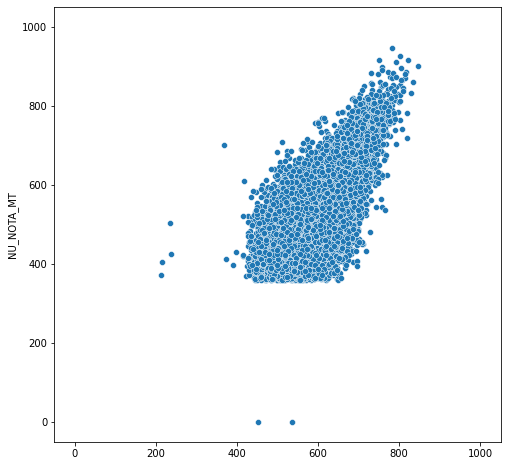

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=predicoes_matematicas_mulheres, y=y_teste)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

Neste ponto temos a relação entre a nota de matemática prevista pelo modelo e essa mesma nota menos as notas de entrada testadas. 


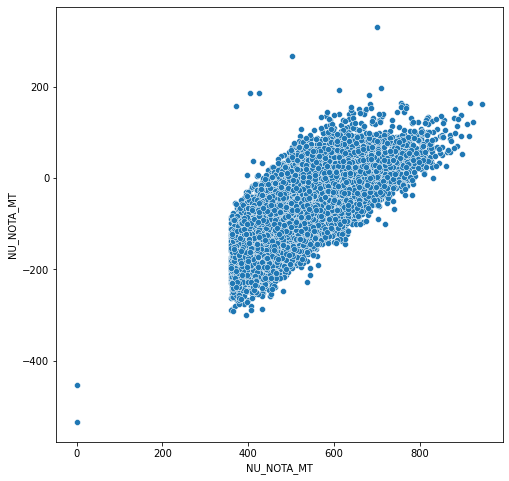

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=y_teste - predicoes_matematicas_mulheres)

Podemos observar a relação entre a nota de saída, prevista pelo medelo, e a média das notas testadas a partir dos dados existentes. 
Perceba que a nota de matemática tem mais participantes em dispersão, sugerindo um menor agrupamento de notas parecidas pra média de dados existentes.

(-50.0, 1050.0)

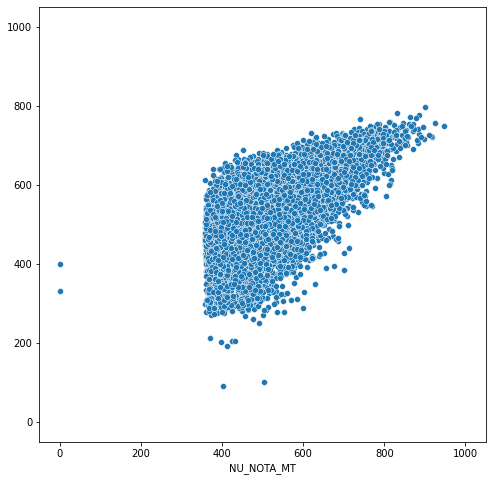

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=x_teste.mean(axis=1))
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

In [ ]:
resultados_mulheres = pd.DataFrame()
resultados_mulheres["Real"] = y_teste
resultados_mulheres["Previsao"] = predicoes_matematicas_mulheres
resultados_mulheres["diferenca"] = resultados_mulheres["Real"] - resultados_mulheres["Previsao"]
resultados_mulheres["quadrado_diferenca"] = (resultados_mulheres["Real"] - resultados_mulheres["Previsao"])**2

In [ ]:
resultados_mulheres

,Real,Previsao,diferenca,quadrado_diferenca
54842,570.3,571.428670,-1.128670,1.273895
66910,493.1,542.436289,-49.336289,2434.069373
13495,484.7,578.410096,-93.710096,8781.582062
102752,368.4,705.674862,-337.274862,113754.332695
28372,486.6,703.872252,-217.272252,47207.231616
...,...,...,...,...
37739,633.8,524.273139,109.526861,11996.133240
36012,440.4,588.230023,-147.830023,21853.715649
109047,667.8,626.218281,41.581719,1729.039376
50694,433.4,552.398408,-118.998408,14160.621222


In [ ]:
resultados_mulheres["quadrado_diferenca"].mean()

23836.90203761849

In [ ]:
resultados_mulheres["quadrado_diferenca"].mean()**(1/2)

154.39204007207914

In [ ]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_predicoes)

10106.948693930235

In [ ]:
mean_squared_error(y_teste, predicoes_matematicas_mulheres)

23836.90203761858

Com a arvore de decisão será possivel testar vários comportamentos dos dados e verificar se o modelo está performando como o esperado.



In [ ]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state=SEED)
modelo.fit(x_treino, y_treino)
predicoes_matematicas_mulheres = modelo.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematicas_mulheres)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


7623.689056876909

In [ ]:
from sklearn.tree import DecisionTreeRegressor

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25)
modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
predicoes_matematica_arvore = modelo_arvore.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematica_arvore)

5091.110456963713

In [ ]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados_mulheres = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados_mulheres["test_score"]*-1).mean()

Para ter acesso ao intervalo de confiança de testes, criei uma função para calcular os resultados. Os limites inferiores e superiores, contém,respectivamente, a média minima e máxima da nota de matemática. 

In [ ]:
def calcula_mse(resultados_mulheres):
    media = (resultados_mulheres["test_score"]*-1).mean()
    desvio_padrao = (resultados_mulheres["test_score"]*-1).std()
    lim_inferior = media - (2*desvio_padrao)
    lim_superior = media + (2*desvio_padrao)
    print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import numpy as np

SEED= 1232
np.random.seed(SEED)



partes = KFold(n_splits = 10, shuffle=True)
modelo_arvore = DecisionTreeRegressor(max_depth=3)
resultados_mulheres = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error")
calcula_mse(resultados_mulheres)

Intervalo de confiança 4945.654189336379 - 5372.893430392362


In [ ]:
def regressor_arvore(nivel):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultados_mulheres = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Treino = {(resultados_mulheres['train_score']*-1).mean()}|Teste = {(resultados_mulheres['test_score']*-1).mean()}")


Com os resultados obtidos através da decisiontreeregressor, podemos ver que este modelo aprendeu com os dados fornecidos e que gerou diferença pequena entre os resultados das notas de treino e teste.

In [ ]:
for i in range(1,21):
    regressor_arvore(i)

Treino = 6701.259354637141|Teste = 6717.353008961189
Treino = 5538.058270376796|Teste = 5553.205354894946
Treino = 5128.77113588921|Teste = 5159.27380986437
Treino = 4892.811803815438|Teste = 4941.558928020178
Treino = 4730.640672920534|Teste = 4827.188242491551
Treino = 4613.4624417123505|Teste = 4749.3824906754435
Treino = 4515.855279633324|Teste = 4724.530622436823
Treino = 4415.6178152614175|Teste = 4764.119230420781
Treino = 4292.303307757597|Teste = 4850.789341494479
Treino = 4133.796286730011|Teste = 4986.629098234065
Treino = 3936.5474919842213|Teste = 5216.13110954096
Treino = 3703.1937349070495|Teste = 5461.26753077415
Treino = 3436.069437216611|Teste = 5746.160396802236
Treino = 3141.8390709618175|Teste = 6078.7515818148595
Treino = 2835.0713507497258|Teste = 6411.515591118995
Treino = 2518.8428565045074|Teste = 6764.131024923465
Treino = 2208.689073837751|Teste = 7093.988543902987
Treino = 1912.7958404585836|Teste = 7411.841718541682
Treino = 1639.3433946224636|Teste = 7687

# Conclusão

Com este projeto aprendi muito sobre análise de dados e pude fazer muitos questionamentos sobre uma possível relação da classe social com as notas e uma possível desigualdade de genêro quando se fala de ciências exatas. 

Os dados apontaram para uma forte correlação entre as notas das mulheres e sua renda familiar e também mostraram uma realidade em que mulheres pobres, em média, sofrem para se manter estudando enquanto mulheres de classes sociais altas mantém uma maior média nas exatas. 

Esse notebook está processando apenas uma pequena amostra dos dados, o que torna a pesquisa mais superficial. 

Ao final deste projeto, só tenho a agradecer a Alura pelas aulas que me guiaram no aprendizado de machine learning e me fizeram despertar muitos questionamentos e vontade de criar novos projetos.

### Por mais mulheres na educação, na tecnologia e nas exatas

A inspiração foi tanta que baixei os dados do Enem/2019 só das [mulheres de SC](https://github.com/Aline-Noronha/ImersaoDadosEnem2019/blob/muheres-sc/mulheres-sc.csv) e com todos os registros de SC estou pesquisando sobre a [realidade das mulheres na educação](https://github.com/Aline-Noronha/ImersaoDadosEnem2019/pull/1). 

Sinta-se livre para contribuir e mandar sugestões no [projeto do github](https://github.com/Aline-Noronha/ImersaoDadosEnem2019/issues) ou via [email](mailto:alinenoronhadfn@gmail.com). 

